## importing libraries 

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## creat dataset

In [82]:
dataset = np.array([[0 , 0.0002] , [20 , 0.0012] , [40 , 0.0060] , [60 , 0.0300] , [80 ,0.0900] , [100 , 0.2700]])   
df = pd.DataFrame(dataset , columns=(["tempreture" , "pressure"]))
feature = df.iloc[ :  , : -1].values
target = df.iloc[ :  , -1: ].values


## standardizitaion

In [83]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
feature = ssc.fit_transform(feature)
target = ssc.fit_transform(target)

## regression

In [84]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(feature , target)

LinearRegression()

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(feature)
poly.fit(x_poly , target)
regressor2 = LinearRegression()
regressor2.fit(x_poly , target)

LinearRegression()

## plotting

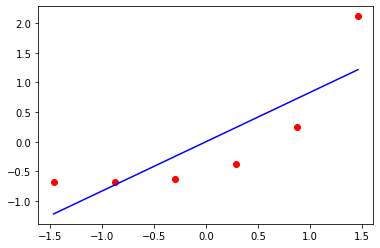

In [86]:
plt.scatter(feature , target , c='r')
plt.plot(feature , regressor.predict(feature), c='b')

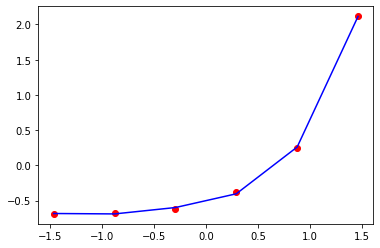

In [87]:
plt.scatter(feature , target , c = "r" )
plt.plot(feature , regressor2.predict(poly.fit_transform(feature)), c = 'b')

In [88]:
from sklearn.metrics import r2_score
print("the poly r2 is :" , r2_score(target , regressor2.predict(poly.fit_transform(feature))))
print("the linear r2 is  : " , r2_score(target ,regressor.predict(feature)))

the poly r2 is : 0.9996910780718014
the linear r2 is  :  0.690349972603981


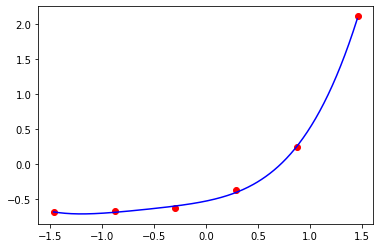

In [89]:
# higher resolution plotting
x_grid = np.arange(min(feature) , max(feature) , 0.01)
x_grid = x_grid.reshape(len(x_grid) , 1 )
plt.scatter(feature , target , c = "r" )
plt.plot(x_grid , regressor2.predict(poly.fit_transform(x_grid)), c = 'b')



[-1.46385011]


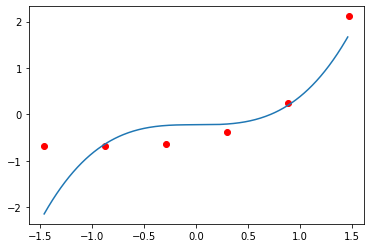

In [90]:
plt.scatter(feature , target , c='r')
xx = np.arange(min(feature) , max(feature) , 0.01)
yy = regressor2.intercept_[0]+regressor2.coef_[0][0]*xx+regressor2.coef_[0][1]+xx*regressor2.coef_[0][2]*np.power(xx , 2)+regressor2.coef_[0][3]*np.power(xx , 3)  
plt.plot(xx , yy)
print(min(feature))

Author = Saleh Mhosseini